# IMPORT DE DONNEES

In [19]:
#VISUALISATION ET IMPORT DE DONNEES
import os
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns



#SKLEARN FUNCTIONS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import joblib


########################      PRE-PROCESSING      #############################


#ouverture et lecture des deux fichiers csv : frequences propres et entrées 
freq = pd.read_csv(open("testPOC.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dictPOC.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################




#######################      TRAIN_TEST_SPLIT      ############################
# 70% de la population sera allouée à l'apprentissage, 30 % pour le test
population_train = 0.7

# mélange et séparation de nos données en 2 datasets  
split_train, split_test = train_test_split(datas, train_size=population_train)

# On extrait les données qui serviront d'objectif à atteindre, soit ici les 
# 8 fréquences propres à prédire

entrees = ['L_tot','rho', 'h', 'b']
split_target_train = split_train.drop(columns=entrees)
split_target_test = split_test.drop(columns=entrees)


frequences = ["freq1"]
split_train = split_train.drop(columns=frequences)
split_test = split_test.drop(columns=frequences)

print("entrées train : \n",split_train)
print("target train : \n", split_target_train)

#split_train = entrees servant à entrainer le modèle
#split test = entrees servant à tester le modèle
#split_target_train = sorties d'entrainement du modèle
#split_target_test = sorties de test du modèle 


#######################      FIN TR_TST_SPLIT      ############################

         L_tot   rho         h         b       freq1
0     0.288160  2700  0.005500  0.009846   54.090599
1     0.172119  2400  0.008618  0.010560  166.140594
2     0.677284  2400  0.042307  0.044046   52.675499
3     0.957810  4510  0.080897  0.078160   71.617699
4     0.530750  2700  0.006690  0.006449   19.395201
...        ...   ...       ...       ...         ...
9995  0.946155  7800  0.050133  0.062122   46.150902
9996  0.333653  7850  0.018539  0.028223  139.140503
9997  0.204040  7850  0.004373  0.011738   87.760803
9998  0.289012  7800  0.017508  0.012411  172.734207
9999  0.698311  4510  0.056114  0.056225   93.457802

[10000 rows x 5 columns]
entrées train : 
          L_tot   rho         h         b
4956  0.458898  8900  0.039582  0.019506
9488  0.911209  2500  0.028147  0.020128
7351  0.480215  7850  0.016531  0.025990
3861  0.227064  2700  0.011593  0.011219
4098  0.741272  4510  0.018408  0.060121
...        ...   ...       ...       ...
6685  0.279029  4510  0.025436  0

# PROCESSING

In [20]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [21]:
"""my_grid_poly ={'polynomialfeatures__degree': [9],
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}


poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
grid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)
#print best score and model
# Ravel plit_target_train
jesuisunfdp = grid_search.fit(split_train, split_target_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)"""

"my_grid_poly ={'polynomialfeatures__degree': [9],\n                'linearregression__fit_intercept': [True, False],\n                'linearregression__normalize': [True, False]}\n\n\npoly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)\ngrid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)\n#print best score and model\n# Ravel plit_target_train\njesuisunfdp = grid_search.fit(split_train, split_target_train)\nprint(grid_search.best_score_)\nprint(grid_search.best_estimator_)\nprint(grid_search.best_params_)"

In [22]:
poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


 0.9988981108699428


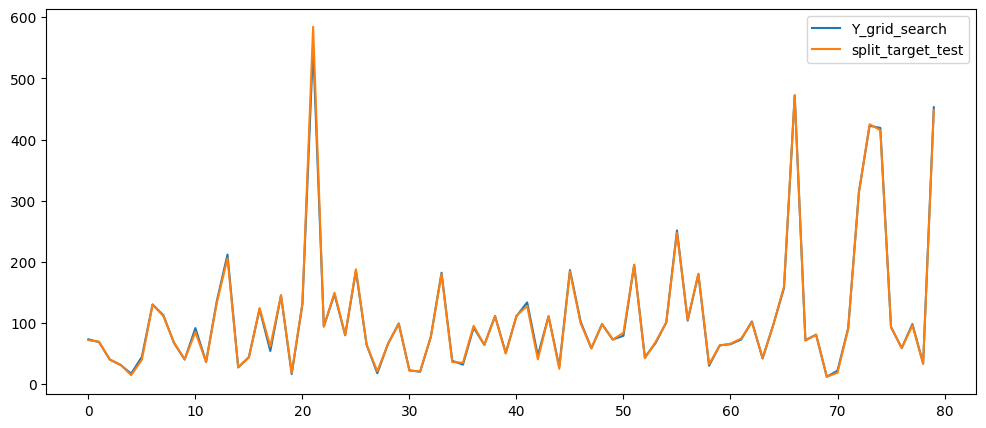

In [23]:
Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()


In [35]:
from sklearn.pipeline import Pipeline


polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(split_train, split_target_train)
print("",pipeline.score(split_test, split_target_test))

 0.7512617834708355


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [34]:
poly_reg_model = PolynomialRegression(2 , fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

 0.7512617834708355


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


# PASSAGE A L'EVALUATION DU MODELE EN FONCTION DU NOMBRE DE DONNEES

In [46]:
freq = pd.read_csv(open("test10el.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict1el.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################


          L_tot   rho         h         b       freq1
0      0.107854  2700  0.010595  0.004782  743.825989
1      0.963487  7850  0.022054  0.059100   19.849300
2      0.855746  7850  0.079650  0.048035   90.876297
3      0.657111  4510  0.008149  0.024741   15.327500
4      0.108837  2500  0.007384  0.003889  529.052307
...         ...   ...       ...       ...         ...
99995  0.425659  2400  0.019574  0.008568   61.702099
99996  0.889934  8900  0.066700  0.079108   50.781300
99997  0.180274  2700  0.014730  0.007937  370.140991
99998  0.431294  2500  0.031679  0.022028  144.532394
99999  0.793565  2400  0.037652  0.060480   34.147800

[100000 rows x 5 columns]


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

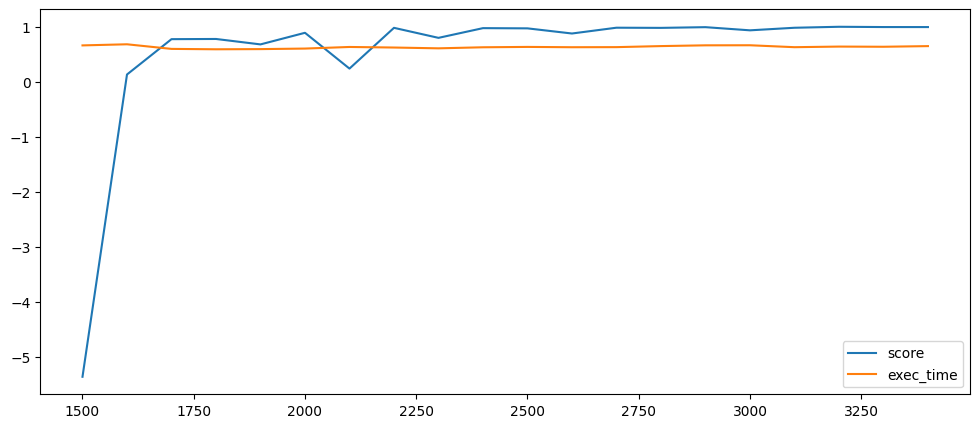

[-5.359799961077797, 0.12946292134185755, 0.7712974835717827, 0.7747380121437033, 0.6761481155230473, 0.8868987253566574, 0.23683241395299015, 0.977026272491552, 0.7949880308795187, 0.97139234454972, 0.9674327194646328, 0.8739572053326363, 0.979333205365157, 0.9762938023480743, 0.9890926769889492, 0.9316978880915131, 0.9783339138361102, 0.9961640955670208, 0.9910884486634634, 0.9907649980904414]
[0.6579701900482178, 0.6782047748565674, 0.5944933891296387, 0.5874226093292236, 0.5905923843383789, 0.6004793643951416, 0.6294779777526855, 0.6193068027496338, 0.6047868728637695, 0.6238868236541748, 0.6304771900177002, 0.6247584819793701, 0.626471996307373, 0.6454513072967529, 0.659294605255127, 0.6605587005615234, 0.6254734992980957, 0.6365344524383545, 0.6332919597625732, 0.6450285911560059]
[1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400]


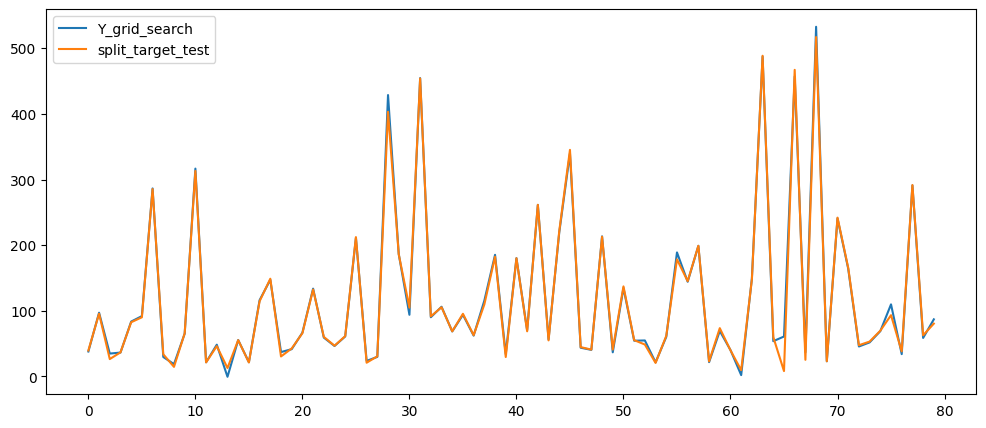

In [60]:
# keep 10000 random values of datas
import time


score = []
nbr_values = []
exec_time = []

for i in range(1500,3500,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

# show best ratio score / exec_time





    





## Entrainement 100 elements finnis


In [66]:
freq = pd.read_csv(open("test100.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict100.csv", "r"),
                    delimiter=",")

# delete last column of inputs
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################

         L_tot   rho         h         b       freq1
0     0.384477  4510  0.028018  0.026937  153.938705
1     0.749060  8900  0.014586  0.069854   15.674900
2     0.816123  4510  0.073874  0.050625   90.078903
3     0.110065  8900  0.006346  0.005231  315.841492
4     0.717205  7850  0.030788  0.011665   50.009701
...        ...   ...       ...       ...         ...
4995  0.474135  2400  0.036221  0.014529   92.021400
4996  0.348351  7800  0.030695  0.027379  208.453201
4997  0.845470  2400  0.047405  0.025971   37.876301
4998  0.479964  2400  0.024620  0.029600   61.039902
4999  0.210392  8900  0.013121  0.020436  178.736496

[5000 rows x 5 columns]


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

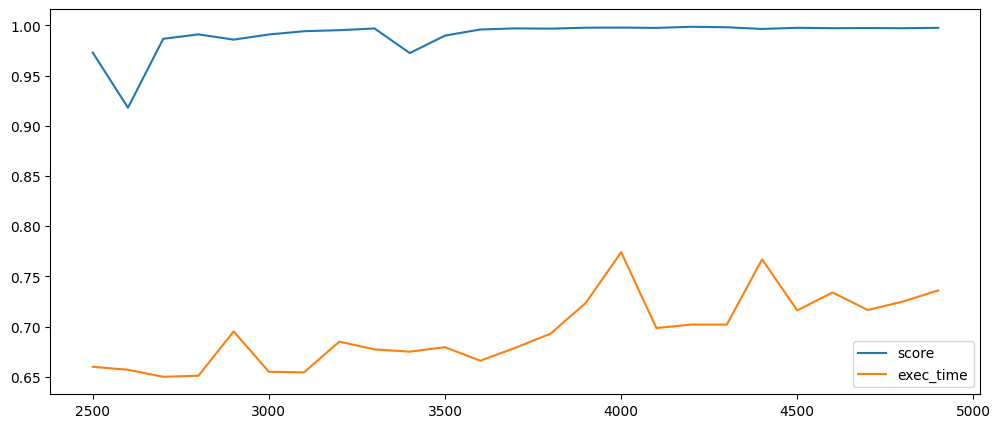

[0.9729103712427758, 0.9179705644559305, 0.9865919459420137, 0.9910399459067107, 0.9857891745227573, 0.9909230404646681, 0.9941856115072225, 0.9951973414470189, 0.9969205380327484, 0.9724200129898973, 0.9898268056687926, 0.9958811731324532, 0.9970226479004447, 0.9967399876597378, 0.9976953152042918, 0.9977944741537412, 0.997485235690421, 0.9985995233887401, 0.9981326089103996, 0.9964394188813955, 0.9975876084320651, 0.9971814812673637, 0.9973449599408497, 0.997166197273183, 0.997549259323429]
[0.6599459648132324, 0.6569936275482178, 0.6499984264373779, 0.6510016918182373, 0.6951625347137451, 0.6549828052520752, 0.6544277667999268, 0.6850030422210693, 0.6772630214691162, 0.675023078918457, 0.6794817447662354, 0.6659953594207764, 0.6789226531982422, 0.6930067539215088, 0.7237248420715332, 0.7741334438323975, 0.6986076831817627, 0.702023983001709, 0.7019593715667725, 0.7670049667358398, 0.7161035537719727, 0.73398756980896, 0.7164881229400635, 0.7249975204467773, 0.7359986305236816]
[2500

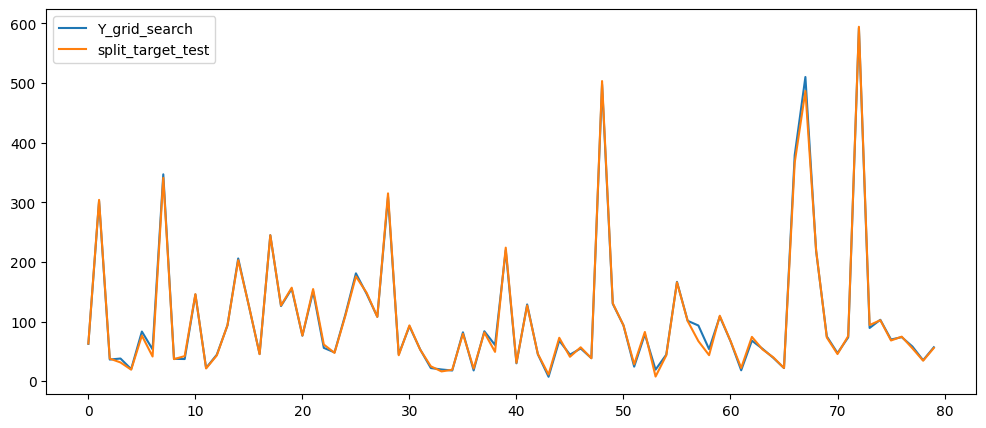

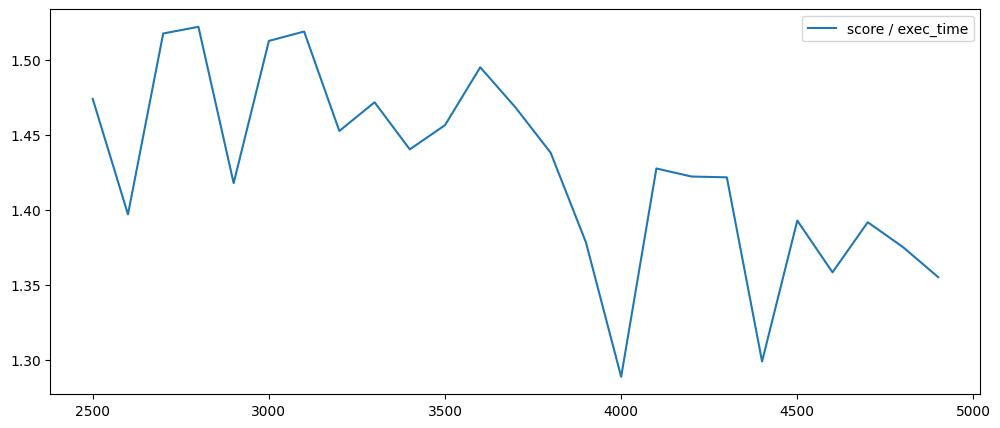

In [69]:
import time


score = []
nbr_values = []
exec_time = []

for i in range(2500,5000,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

for i in range(0, len(score)):
    score[i] = score[i] / exec_time[i]
  

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.legend(
    ['score / exec_time'])
plt.show()




